In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_jpg.zip', 'test_active.csv', 'train.csv', 'train_active.csv', 'periods_train.csv', 'test.csv', 'periods_test.csv', 'train_jpg.zip', 'sample_submission.csv']


### Data Exploration

combine the training and testing data into list to do manipulation the same time
** discription data**
full_des = [train_active, test_active]

target column is the deal_probability 





In [3]:
train_dp = pd.read_csv('../input/train.csv')
test_dp= pd.read_csv('../input/test.csv')
full_dp = [train_dp,test_dp]

In [4]:
train_dp.info()
print ('*'*20)
test_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

### The major challenge for this dataset is to make sence of Russian vocabulary

- Either get translation API to translated in to English
- Deal with synnonymous in Russian database

In [ ]:
# import google translator from url
import urllib 
def import_URL(URL):
    exec urllib.urlopen(URL) in globals()
    
import_URL("https://gist.github.com/1473363.git")

In [5]:
# how many category_name does test and train data possess
cata_group = train_dp[['item_id','parent_category_name']].groupby('parent_category_name')
cata_group.count().head()

,item_id
parent_category_name,
Бытовая электроника,173008
Для бизнеса,18075
Для дома и дачи,178823
Животные,52470
Личные вещи,697623


<Container object of 9 artists>

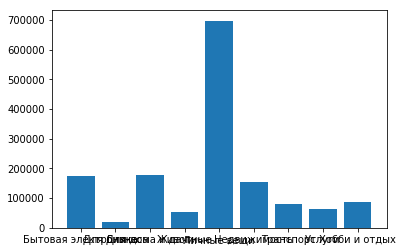

In [7]:
plt.bar(cata_group.count().index,cata_group.count().item_id)